# MARKOWITZ PORTFOLIOTHEORIE

In [1]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = '###############' #PRIVATER ZUGANG
selected = ['AAPL', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2013-1-1', 'lte': '2018-09-02' }, paginate=True)
data.head()

,date,ticker,adj_close
None,,,
0,2018-03-27,WMT,86.05
1,2018-03-26,WMT,87.50
2,2018-03-23,WMT,85.42
3,2018-03-22,WMT,87.14
4,2018-03-21,WMT,88.18


In [8]:
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.head()


adj_close                                        
ticker            CNP          F         GE   TSLA        WMT
date                                                         
2013-01-02  15.861693  10.597592  18.236793  35.36  61.097979
2013-01-03  15.910199  10.806333  18.031693  34.77  60.709719
2013-01-04  16.023382  10.894646  18.117151  34.40  60.939145
2013-01-07  15.845524  10.782247  18.057330  34.34  60.356755
2013-01-08  15.740426  10.718020  17.860776  33.68  60.524413

In [12]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [13]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,CNP weight,F weight,WMT weight,GE weight,TSLA weight
0,0.123532,0.141115,0.166602,0.207956,0.299842,0.118392,0.207208
1,0.234136,0.212637,0.062638,0.224571,0.217780,0.362005,0.133005
2,0.204207,0.199782,0.091007,0.228921,0.312117,0.314110,0.053844
3,0.216709,0.192468,0.156996,0.149478,0.249831,0.315252,0.128443
4,0.120286,0.136993,0.118946,0.190707,0.275490,0.105563,0.309294


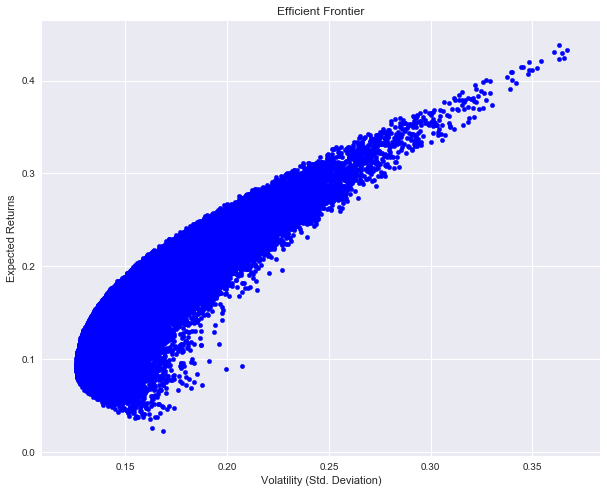

In [32]:
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True, color='b')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()